# Oefeningen association rules

In [22]:
#vraag 1
import pandas as pd

# a. Lees de gegevens in als een dataframe met de naam adultUCI
adultUCI = pd.read_csv('./data/AdultUCI.csv', delimiter=';')

# b. Bekijk de dataset
#print(adultUCI.head())

# c. Verwijder de volgende kolommen uit het dataframe als ze bestaan
adultUCI.drop(columns=['fnlwgt', 'education-num', 'capital-gain', 'capital-loss'], inplace=True)
adultUCI.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       46043 non-null  object
 2   education       48842 non-null  object
 3   marital-status  48842 non-null  object
 4   occupation      46033 non-null  object
 5   relationship    48842 non-null  object
 6   race            48842 non-null  object
 7   sex             48842 non-null  object
 8   hours-per-week  48842 non-null  int64 
 9   native-country  47985 non-null  object
 10  income          32561 non-null  object
dtypes: int64(2), object(9)
memory usage: 4.1+ MB


In [23]:
# d.
# Define the age breaks and labels
age_breaks = [15, 25, 45, 65, 100]
age_labels = ["Young", "Middle-aged", "Senior", "Old"]

# Bin the age column into the specified age classes
adultUCI['age'] = pd.cut(adultUCI['age'], bins=age_breaks, labels=age_labels, right=False)

adultUCI.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             48842 non-null  category
 1   workclass       46043 non-null  object  
 2   education       48842 non-null  object  
 3   marital-status  48842 non-null  object  
 4   occupation      46033 non-null  object  
 5   relationship    48842 non-null  object  
 6   race            48842 non-null  object  
 7   sex             48842 non-null  object  
 8   hours-per-week  48842 non-null  int64   
 9   native-country  47985 non-null  object  
 10  income          32561 non-null  object  
dtypes: category(1), int64(1), object(9)
memory usage: 3.8+ MB


In [24]:
# Define the breaks and labels for hours-per-week
hours_breaks = [0, 25, 40, 60, 168]
hours_labels = ["Part-time", "Full-time", "Over-time", "Workaholic"]

# Bin the hours-per-week column into the specified classes
adultUCI['hours-per-week'] = pd.cut(adultUCI['hours-per-week'], bins=hours_breaks, labels=hours_labels, right=False)

adultUCI.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             48842 non-null  category
 1   workclass       46043 non-null  object  
 2   education       48842 non-null  object  
 3   marital-status  48842 non-null  object  
 4   occupation      46033 non-null  object  
 5   relationship    48842 non-null  object  
 6   race            48842 non-null  object  
 7   sex             48842 non-null  object  
 8   hours-per-week  48842 non-null  category
 9   native-country  47985 non-null  object  
 10  income          32561 non-null  object  
dtypes: category(2), object(9)
memory usage: 3.4+ MB


In [27]:
# e.
transactions = pd.get_dummies(adultUCI, prefix_sep='=')
transactions.head()

,age=Young,age=Middle-aged,age=Senior,age=Old,workclass=Federal-gov,workclass=Local-gov,workclass=Never-worked,workclass=Private,workclass=Self-emp-inc,workclass=Self-emp-not-inc,...,native-country=Scotland,native-country=South,native-country=Taiwan,native-country=Thailand,native-country=Trinadad&Tobago,native-country=United-States,native-country=Vietnam,native-country=Yugoslavia,income=large,income=small
0,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,True
1,False,False,True,False,False,False,False,False,False,True,...,False,False,False,False,False,True,False,False,False,True
2,False,True,False,False,False,False,False,True,False,False,...,False,False,False,False,False,True,False,False,False,True
3,False,False,True,False,False,False,False,True,False,False,...,False,False,False,False,False,True,False,False,False,True
4,False,True,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,True


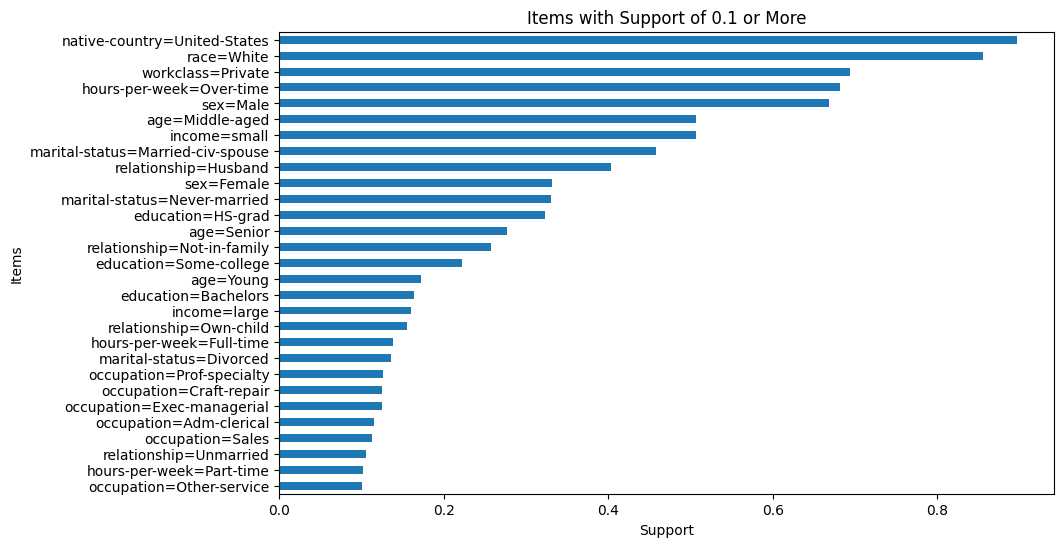

In [28]:
# f.
import matplotlib.pyplot as plt

# Calculate the support for each item
support = transactions.mean()

# Filter items with support of 0.1 or more
high_support_items = support[support >= 0.1]

# Create a bar chart
plt.figure(figsize=(10, 6))
high_support_items.sort_values().plot(kind='barh')
plt.xlabel('Support')
plt.ylabel('Items')
plt.title('Items with Support of 0.1 or More')
plt.show()

In [ ]:
# g.
# race = white & native country = US
# er is dus een te grote voorstelling blanken

In [29]:
# h.
from mlxtend.frequent_patterns import apriori, association_rules

# Apply the apriori algorithm with a minimum support of 0.05
itemsets = apriori(transactions, min_support=0.05, use_colnames=True)

# Generate association rules with a minimum confidence of 0.6
rules = association_rules(itemsets, metric="confidence", min_threshold=0.6)

# Define the rule_filter function
def rule_filter(row, minlen, maxlen):
    length = len(row['antecedents']) + len(row['consequents'])
    return minlen <= length <= maxlen

# Apply the rule_filter function to the rules DataFrame
filtered_rules = rules[rules.apply(rule_filter, axis=1, minlen=2, maxlen=3)]

# Count the number of rules that meet the criteria
num_rules = len(filtered_rules)
print(f"Number of rules found: {num_rules}")


Number of rules found: 1191


In [30]:
# i.
# Sort the filtered rules by confidence in descending order
sorted_rules = filtered_rules.sort_values(by='confidence', ascending=False)

# Display the top rules with the highest confidence
top_rules = sorted_rules.head()
print(top_rules)

                                            antecedents consequents  \
357                  (age=Senior, relationship=Husband)  (sex=Male)   
986   (relationship=Husband, occupation=Prof-specialty)  (sex=Male)   
661         (relationship=Husband, education=Bachelors)  (sex=Male)   
930     (occupation=Craft-repair, relationship=Husband)  (sex=Male)   
1038               (relationship=Husband, income=large)  (sex=Male)   

      antecedent support  consequent support   support  confidence      lift  \
357             0.156587            0.668482  0.156587         1.0  1.495926   
986             0.055137            0.668482  0.055137         1.0  1.495926   
661             0.074444            0.668482  0.074444         1.0  1.495926   
930             0.076389            0.668482  0.076389         1.0  1.495926   
1038            0.121166            0.668482  0.121166         1.0  1.495926   

      leverage  conviction  zhangs_metric  
357   0.051911         inf       0.393067  
986 

In [ ]:
# j.
# Op zich is het dan logisch dat de confidence 1 is. Alle Husbands zullen inderdaad aangeven dat ze Man zijn.

In [31]:
# k.
adultUCI.drop(columns=['relationship'], inplace=True)